In [15]:
import db_connect
import pandas
import matplotlib.pyplot as plt   # 資料視覺化套件
import matplotlib

In [6]:
# 建立與MySQL的連線
my_connt_obj = db_connect.mysql_connect()
conn = my_connt_obj.connect()

In [7]:
# 取得資料庫的資料
df = pandas.read_sql("SELECT * FROM StockTransactionInfo WHERE TradeDate >'2021-01-01'", con=conn)
conn.close() # 關閉連線

In [8]:
# 檢查取得的資料
"""這樣只會顯示最後一個呼叫的資料，所以看不到.head()
df.head()   # 檢查頭五筆資料
df.tail()   # 檢查後五筆資料
"""
print(df.head() )
print(df.tail() )

    TradeDate  TranscationQty  TranscationAmount  TranscationCount     Taiex  \
0  2021-01-04      9339297176       349548269131           2722333  14902.03   
1  2021-01-05      9179847742       350088920543           2734498  15000.03   
2  2021-01-06     11485851750       438656275380           3414581  14983.13   
3  2021-01-07      8827119922       342426405710           2510944  15214.00   
4  2021-01-08      9249546443       400844785586           2700784  15463.95   

   ChangePoint          CreateTime  
0       169.50 2021-09-13 22:57:52  
1        98.00 2021-09-13 22:57:52  
2       -16.90 2021-09-13 22:57:52  
3       230.87 2021-09-13 22:57:52  
4       249.95 2021-09-13 22:57:52  
      TradeDate  TranscationQty  TranscationAmount  TranscationCount  \
164  2021-09-07      6809125095       337806586675           2159870   
165  2021-09-08      6716726562       325685541312           2204512   
166  2021-09-09      5177907252       246914721428           1644144   
167  2021

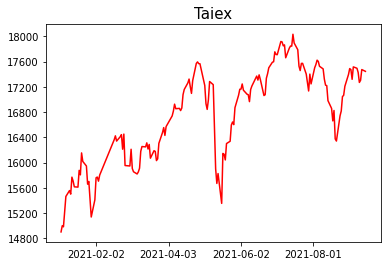

In [21]:
# 畫圖
plt.plot(df["TradeDate"], df["Taiex"],"r")  # (x軸資料, y軸資料, 線的顏色)
plt.title("Taiex", {"fontsize":15})     # 設定圖的標題及文字大小
# 設定Ｘ軸刻度
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
# 設定y軸刻度
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))

Text(0.5, 1.0, 'TranscationAmount')

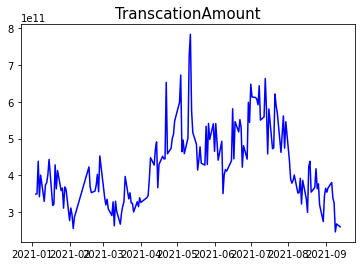

In [23]:
# 畫圖
plt.plot(df["TradeDate"], df["TranscationAmount"],"b")  # (x軸資料, y軸資料, 線的顏色)
plt.title("TranscationAmount", {"fontsize":15})     # 設定圖的標題及文字大小

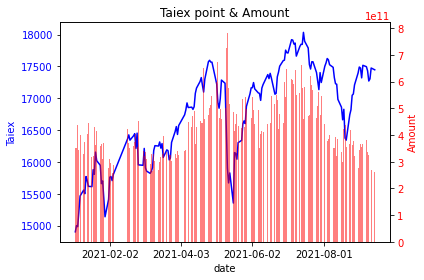

In [25]:
# 畫圖
# 在畫圖的地方，無法寫中文的名稱
fig, ax1 = plt.subplots()
plt.title("Taiex point & Amount")
plt.xlabel("date")
ax2 = ax1.twinx()

# 製作第一個圖表：折線圖
# blue：表示藍色，可以用「b」表示
ax1.set_ylabel("Taiex", color="blue")
ax1.plot(df["TradeDate"], df["Taiex"], color="blue", alpha=1)
ax1.tick_params(axis="y", labelcolor="blue")

# 製作第二個圖表：長條圖
# r：表示紅色，可以用「red表示」
ax2.set_ylabel("Amount", color="r")
ax2.bar(df["TradeDate"], df["TranscationAmount"], color="r", alpha=0.5) # alpha: 增加透明度
ax2.tick_params(axis="y", labelcolor="r")

# 設定Ｘ軸刻度
ax = plt.gca()
ax.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(5))
# 設定y軸刻度
ax.yaxis.set_major_locator(matplotlib.ticker.MaxNLocator(10))

fig.tight_layout()
plt.show()